In [207]:
# IMPORT
import pandas as pd
import numpy as np
import re
from olist.data import Olist

# visualization
import matplotlib.pyplot as pl
import seaborn as sns
import folium

# Map number of orders by location

In [148]:
data = Olist().get_data()

In [149]:
sellers = data['sellers']
geolocation = data['geolocation']

In [205]:
# need to use regex here. create new function to remove "seller_" or "customer_"

In [221]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [218]:
text = 'seller_zip_code_prefix'
pattern = '^\w*?_'
re.findall(pattern, text) 


['seller_']

In [231]:
test = ['seller_zip_code_prefix','seller_id']


{'seller_zip_code_prefix': 'zip_code_prefix', 'seller_id': 'id'}

In [246]:
def plot_by_zip_code(df):
    '''
    Return seaborn barplot of number of sellers/customers in each state,
    with annotation in percentage.
    Input = processed df containing zip code lat long and number of sellers or customers
    '''
    sns.set(rc={'figure.figsize':(16,8)})
    plot = sns.barplot(x= df.iloc[:,1], y = df.iloc[:,0], data= df);

    y = 0
    for patch, percentage in zip(plot.patches, df.iloc[:,2]):
        x = patch.get_width() + 20
        plot.annotate(percentage,(x,y), verticalalignment= 'center')
        y += 1

In [245]:
count_p_location(sellers,['seller_state','seller_id'],"state")

,state,id,Percentage
0,SP,1849,59.7%
1,PR,349,11.3%
2,MG,244,7.9%
3,SC,190,6.1%
4,RJ,171,5.5%
5,RS,129,4.2%
6,GO,40,1.3%
7,DF,30,1.0%
8,ES,23,0.7%
9,BA,19,0.6%


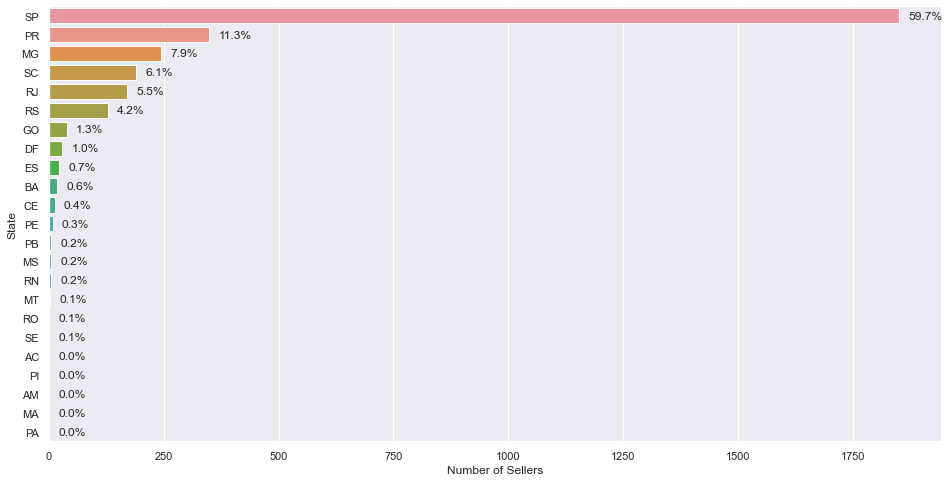

In [159]:
sellers_by_state = location_data_process(sellers, ['seller_state','seller_id'], 'Sellers')

by_state_plot(sellers_by_state)


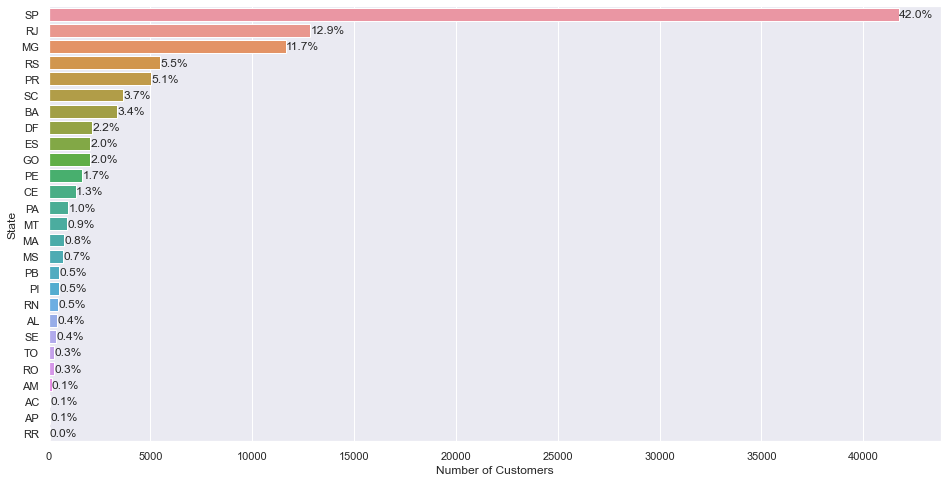

In [160]:
customers_by_state = location_data_process(customers, ['customer_state','customer_id'], 'Customers')

by_state_plot(customers_by_state)

In [190]:
sellers_by_zip_code = sellers[['seller_zip_code_prefix','seller_id']]\
        .groupby('seller_zip_code_prefix')\
        .count()\
        .rename(columns= {'seller_id': "Number of Sellers"})\
        .sort_values(by= 'Number of Sellers', ascending= False)\
        .reset_index()
sellers_by_zip_code = sellers_by_zip_code.merge(geo_by_zip_code, 
                          how = 'left', 
                          left_on = 'seller_zip_code_prefix',
                          right_on='geolocation_zip_code_prefix')
# drop nan values to plot
sellers_by_zip_code.dropna(inplace= True)

In [204]:
sellers_by_zip_code

,seller_zip_code_prefix,Number of Sellers,geolocation_lat,geolocation_lng
0,14940,49,-21.757321,-48.829744
1,13660,10,-21.866032,-47.478102
2,13920,9,-22.740325,-46.896754
3,16200,9,-21.294954,-50.343267
4,87050,8,-23.431131,-51.918235
...,...,...,...,...
2241,9411,1,-23.718908,-46.394716
2242,9405,1,-23.700766,-46.404333
2243,9400,1,-23.711851,-46.412441
2244,9340,1,-23.671407,-46.430267


In [197]:
def plot_map(df):
    map = folium.Map(location=[df['geolocation_lat'].mean(), 
                               df['geolocation_lng'].mean()], zoom_start=5, control_scale=True)

    for i, row in df.iterrows():
        folium.Marker(location=[row.geolocation_lat, row.geolocation_lng],
#                         popup=row.seller_zip_code_prefix,
                        icon=folium.Icon(color="red", icon="flag"),
                        ).add_to(map)
    return map

In [198]:
plot_map(sellers_by_zip_code)